# Epithelium Visualization

In [1]:
import tyssue

import numpy as np
import pandas as pd

import matplotlib.pylab as plt
%matplotlib inline


from tyssue import Sheet, SheetGeometry  as geom
from tyssue.generation import three_faces_sheet
from tyssue.draw import sheet_view


In [2]:
datasets, specs = three_faces_sheet()
sheet = Sheet('3cells_2D', datasets, specs)


geom.update_all(sheet)

In [3]:
sheet.vert_df.describe().head(3)

,x,y,z,is_active,rho,height,basal_shift
count,13.000000,1.300000e+01,13.0,13.0,13.0,13.0,13.0
mean,0.000000,-8.540177e-18,0.0,1.0,0.0,-4.0,4.0
std,1.172604,1.172570e+00,0.0,0.0,0.0,0.0,0.0


## Matplotlib based representation

### Custom settings

These might go in a config file latter on.

#### Ploting itself

## Epithelial sheet representation


### The  default

In [4]:
draw_specs = tyssue.config.draw.sheet_spec()

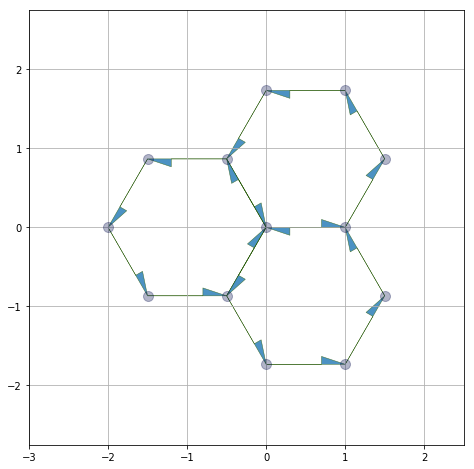

In [5]:
fig, ax = sheet_view(sheet, ['x', 'y'])


ax.set_xlim(-3, 2.5)
ax.set_ylim(-2.75, 2.75)
fig.set_size_inches((8, 8))
    


#### Coloring

In [6]:

## Let's add a column to sheet.vert_df
sheet.vert_df['rand'] = np.linspace(0.0, 1.0, num=sheet.vert_df.shape[0])

cmap = plt.cm.get_cmap('viridis')
color_cmap = cmap(sheet.vert_df.rand)

draw_specs['vert']['color'] = color_cmap
draw_specs['vert']['alpha'] = 0.5
draw_specs['vert']['s'] = 500

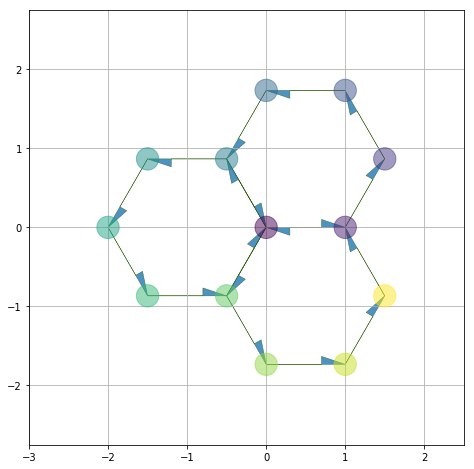

In [7]:
coords = ['x', 'y']
fig, ax = sheet_view(sheet, coords, **draw_specs)

ax.set_xlim(-3, 2.5)
ax.set_ylim(-2.75, 2.75)
fig.set_size_inches((8, 8))

#### Filling the cells



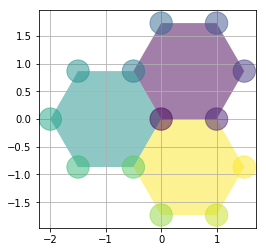

In [8]:
sheet.face_df['col'] = np.linspace(0.0, 1.0, 
                                    num=sheet.face_df.shape[0])

cmap = plt.cm.get_cmap('viridis')
color_cmap = cmap(sheet.face_df.col)

draw_specs['edge']['visible'] = False

draw_specs['face']['visible'] = True
draw_specs['face']['color'] = color_cmap
draw_specs['face']['alpha'] = 0.5


fig, ax = sheet_view(sheet, coords, **draw_specs)

In [9]:
draw_specs['edge']['visible'] = True

#draw_specs['face']['visible'] = False
draw_specs['face']['color'] = color_cmap
draw_specs['face']['alpha'] = 0.5

edge_color = np.linspace(0.0, 1.0, 
                        num=sheet.edge_df.shape[0])

cmap = plt.cm.get_cmap('viridis')
edge_cmap = cmap(edge_color)
draw_specs['edge']['color'] = edge_cmap #[0, 0, 0, 1]
#draw_specs['edge']['color'] = [0, 0, 0, 0.2]

draw_specs['edge']['width'] = 8. * np.linspace(0.0, 1.0, 
                        num=sheet.edge_df.shape[0])

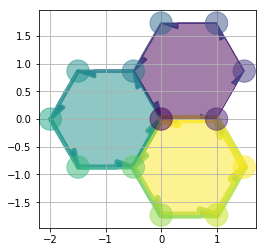

In [10]:
fig, ax = sheet_view(sheet, coords, **draw_specs)

## Ipyvolume based

In [11]:
from tyssue import Monolayer, config
from tyssue.generation import extrude

extruded = extrude(sheet.datasets, method='translation')
specs = config.geometry.bulk_spec()
monolayer = Monolayer('mono', extruded, specs)


import ipyvolume as ipv
ipv.clear()
fig2, mesh = sheet_view(monolayer, mode="3D")
fig2

/home/guillaume/miniconda3/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Figure(camera=PerspectiveCamera(fov=46.0, position=(0.0, 0.0, 2.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.…

### Vertex based color

In [12]:
color = (monolayer.vert_df.x**2
         + monolayer.vert_df.y**2
         + monolayer.vert_df.z**2)

ipv.clear()
fig2, mesh = sheet_view(monolayer, mode="3D", edge={"color": color})
fig2

Figure(camera=PerspectiveCamera(fov=46.0, position=(0.0, 0.0, 2.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.…

#### Edge based color

In [13]:
color = monolayer.edge_df['dy']
ipv.clear()
fig2, mesh = sheet_view(monolayer, mode="3D", edge={"color": color})
fig2

Figure(camera=PerspectiveCamera(fov=46.0, position=(0.0, 0.0, 2.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.…

### Face colors

In [14]:
draw_specs = {
    "edge": {
        "visible": True,
        "color": color
    },
    "face": {
        "visible": True,
        "color": monolayer.face_df.z
    }
}

ipv.clear()
fig2, mesh = sheet_view(monolayer, mode="3D", **draw_specs)
fig2

Figure(camera=PerspectiveCamera(fov=46.0, position=(0.0, 0.0, 2.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.…